In [2]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json

# Manager API

In [74]:

class RESTManager:
    HOST_NAME = "dolphin.jump-technology.com"
    PORT = "8443"

    URL = "https://" + HOST_NAME + ":" + PORT + "/api/v1/"

    USERNAME_USER1 = "EPITA_GROUPE8"
    PASSWORD_USER1 = "AgLyQx64Jw6pAkW9"

    auth = (USERNAME_USER1, PASSWORD_USER1)


    def get(self, path):
        return requests.get(self.URL+path, auth=self.auth, verify=False).text
    
    def post(self, path):
        return requests.post(self.URL+path, auth=self.auth, verify=False).text
    
    def get_asset(self):
        dt_text = self.get("asset")
        dt = json.loads(dt_text)
        df = []
        for i in range(len(dt)):
            tmp = {}
            for key in dt[i]:
                tmp[key] = dt[i][key]["value"]
            df.append(tmp)
        df = pd.DataFrame(df)
        return df
    
    def get_asset_id(self, uid):
        dt_text = self.get(f"asset/{uid}")
        dt = json.loads(dt_text)
        df={}
        for key in dt:
            df[key] = dt[key]["value"]
        #df = pd.DataFrame(df)
        return df
    
    def get_asset_id_quote(self, uid):
        dt_text = self.get(f"asset/{uid}/quote")
        dt = json.loads(dt_text)
        df = []
        for i in range(len(dt)):
            tmp = {}
            for key in dt[i]:
                tmp[key] = dt[i][key]["value"]
            df.append(tmp)
        df = pd.DataFrame(df)
        df = df.set_index('date')
        l = ["ask" ,"asset" ,"bid" ,"close" ,"feed_source" ,"gross" ,"high" ,"low","nav" ,"open", "pl" ,"real_close_price" ,"return" ,"volume"]
        for elt in l:
            df[elt] = df[elt].str.replace(',', '.').astype(float)
        return df
    
    def get_ratio(self):
        self.get("ratio")
    
    def sharpe(self, df, taux_sans_risque, periode=30):
        df['Log_Ret'] = np.log(df['close'] / df['close'].shift(1))
        df['Volatility'] = df['Log_Ret'].rolling(window=periode).std() * np.sqrt(periode)
        sharpe = (df["return"] - taux_sans_risque["1 mois"])/df["Volatility"]
        return sharpe
        

req = RESTManager()

In [27]:
df_asset = req.get_asset()

/home/Thomas/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [28]:
df_asset[["ASSET_DATABASE_ID","LAST_GROSS_VALUE", "MARKET_PLACE_MIC", "CURRENCY", "LAST_QUOTE_DATE","MARKET_PLACE_CURRENCY"]]

,ASSET_DATABASE_ID,LAST_GROSS_VALUE,MARKET_PLACE_MIC,CURRENCY,LAST_QUOTE_DATE,MARKET_PLACE_CURRENCY
0,1845,"26,158358284815 EUR",XETR,EUR,2020-10-23,EUR
1,1846,"28,129136522277 EUR",XPAR,EUR,2020-10-23,EUR
2,2122,"82,928847761071 EUR",NaN,EUR,2020-10-23,EUR
3,2123,"42,844024261715 EUR",NaN,EUR,2020-10-23,EUR
4,2124,"5,624308945175 EUR",NaN,EUR,2020-10-23,EUR
5,1428,"9,305059505649 EUR",NaN,EUR,2020-10-23,EUR
6,1847,"30,682432843433 EUR",TOMX,EUR,2020-10-23,EUR
7,1848,"40,005449974221 EUR",XETR,EUR,2020-10-23,EUR
8,1849,"7,680015926775 EUR",XPAR,EUR,2020-10-23,EUR
9,2154,"137,736219606939 USD",NaN,USD,2020-10-23,EUR


In [65]:
req.get_asset_id("1845")

/home/Thomas/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'REST_OBJECT_ID': '1845',
 'REST_UNIQUE_NUMBER': '1845',
 'LABEL': '1&1 DRILLISCH AG',
 'TYPE': 'STOCK',
 'CURRENCY': 'EUR',
 'BLOOMBERG_CODE': 'DRI GY EQUITY',
 'ISIN_CODE': 'DE0005545503',
 'SUB_SECTOR': 'Télécommunications mobiles',
 'MARKET_PLACE': 'FRANCFORT (XETR)',
 'FLOATING_VALUE': '0,2654572',
 'COUNTRY': 'Allemagne',
 'IS_PUBLICLY_TRADED': 'true',
 'MARKET_PLACE_TELEKURS': '44',
 'GICS_SUB_INDUSTRY': 'Services de Télécommunication Mobile',
 'QUOTE_TYPE': 'value',
 'IS_STRUCTURED_PRODUCT': 'false',
 'IS_DEPOSITARY_QUOTES': 'false',
 'IS_ACCESSIBILITY_PUBLIC': 'true',
 'ASSET_STATUS': 'normal',
 'CITY_OR_ACRONYM_OR_NAME': 'FRANCFORT',
 'SEDOL_CODE': '5734672',
 'SUB_TYPE': 'ORDINARY_STOCK',
 'CODE_CIC': 'DE31',
 'STOCK_TYPE': 'Ordinaire',
 'LIQUIDITY_ALGO': 'UseGridLiquidityAlgorithm',
 'BLOOMBERG_ID': 'BBG000BD8RR1',
 'quote_value_type': 'Défaut',
 'ASSET PRICE MODE': 'Par Défaut (configuration)',
 'PAY_ACCOUNT_ON_DEFAULT': 'false',
 'ASSET_DATABASE_ID': '1845',
 'EMIR_CLEAR

In [66]:
req.get("ratio")

/home/Thomas/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


'[{"id":11,"type":"Ratio","name":"Correlation","is_benchmark_needed":true,"is_percent":false},{"id":7,"type":"Ratio","name":"Exposition action","is_benchmark_needed":false,"is_percent":true},{"id":15,"type":"Ratio","name":"Exposition action","is_benchmark_needed":false,"is_percent":true},{"id":8,"type":"Ratio","name":"RDT","is_benchmark_needed":false,"is_percent":true},{"id":13,"type":"Ratio","name":"Rendement","is_benchmark_needed":false,"is_percent":true},{"id":9,"type":"Ratio","name":"Rendement_annualise","is_benchmark_needed":false,"is_percent":true},{"id":12,"type":"Ratio","name":"Sharpe","is_benchmark_needed":false,"is_percent":false},{"id":14,"type":"Ratio","name":"VaR historique","is_benchmark_needed":false,"is_percent":true},{"id":10,"type":"Ratio","name":"Volatilite","is_benchmark_needed":false,"is_percent":true}]'

# Optimisation de portefeuille

In [99]:
df1= req.get_asset_id_quote("1845")[["close","return"]]
df2= req.get_asset_id_quote("1846")[["close","return"]]
df3= req.get_asset_id_quote("1847")[["close","return"]]
df1

/home/Thomas/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/Thomas/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/Thomas/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


,close,return
date,,
2013-06-03,12.585000,0.000000
2013-06-04,12.670000,0.006754
2013-06-05,12.350000,-0.025257
2013-06-06,12.355000,0.000405
2013-06-07,12.480000,0.010117
2013-06-10,12.430000,-0.004006
2013-06-11,12.405000,-0.002011
2013-06-12,12.300000,-0.008464
2013-06-13,12.010000,-0.023577


In [161]:
mat_return = np.array(
    [df1["return"].values[-365:],
     #df2["return"].values[-365:],
     df3["return"].values[-365:]])

def sharpe(w,mat_return):
    mat_cov = np.cov(mat_return)


    if w.ndim != 1:
        variance = []
        for i in range(w.shape[0]):
            variance.append(w[i] @ mat_cov @ w[i].T)
    else:
        variance = w @ mat_cov @ w.T
        
    variance = np.array(variance)
    std = np.sqrt(variance)
    average_rend = mat_return.mean(axis=1)
    
    return (variance, std, average_rend@w.T)


rend: -0.000497645464657119 & volatilité: 0.0111773534641155 -> poid: [0.60606061 0.39393939]


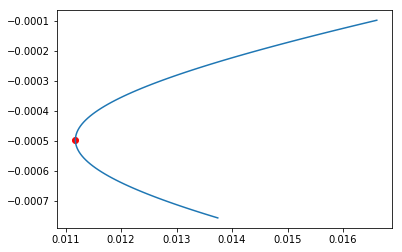

In [168]:
w = np.linspace(0, 1, num=100)
W = np.array([w, 1-w]).T

variance, std, rend = sharpe(W, mat_return)

minimum = np.argmin(std)

print(f"rend: {rend[minimum]} & volatilité: {std[minimum]} -> poid: {W[minimum]}")

plt.plot(std,rend)
plt.scatter(std[minimum], rend[minimum], c="red")